In [100]:
!pip install pandas==0.24.2
!pip install --user pandas_ml==0.6.1
#downgrade matplotlib to bypass issue with confusion matrix being chopped out
!pip install matplotlib==3.1.0
!pip install seaborn
!pip install pydot
!pip install graphviz
!pip install numpy==1.16.4

In [101]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score,mean_absolute_error

import pandas as pd, numpy as np
import sys
import io

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.tree import export_graphviz
import pydot




from nose.tools import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats


In [102]:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9f1d63550a5e4212ad65f048f41f57b1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-9Z8ff4DGZTLU57fqK8r_Mseu0IiILUcNOzLlZ8vfr2h',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9f1d63550a5e4212ad65f048f41f57b1.get_object(Bucket='predictinglifeexpectancy-donotdelete-pr-7dt5nmb0rizgnn',Key='datasetLE.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
LEdata = pd.read_csv(body)
LEdata.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [103]:
status=pd.get_dummies(LEdata.Status)
LEdata=LEdata.drop(["Status"],axis=1)
#Status is the only non numeric collumn so we need to remove it and replace it with 1 and 0

In [104]:
LEdata=pd.concat([LEdata,status],axis=1)

In [105]:
#Replacing null values with the average across the collumn 
LEdata2=LEdata.fillna(value=LEdata.mean())
#Replacing the yearly data with a single mean data across all the years
LEdata2=LEdata2.groupby("Country").mean()
LEdata2=LEdata2.drop(["Year"],axis=1)
LEdata2.head()


,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,73.61875,108.1875,20.3125,0.668929,236.185241,78.735115,1943.8750,48.74375,23.5000,91.7500,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,49.01875,328.5625,83.7500,5.669554,102.100268,74.911452,3561.3125,18.01875,132.6250,46.1250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,75.05625,127.5000,0.0000,7.740179,1001.585226,97.183779,0.0000,38.42500,0.0000,96.9375,...,98.3125,0.12500,9759.305728,1.275338e+07,3.42500,3.37500,0.488625,8.84375,0,1


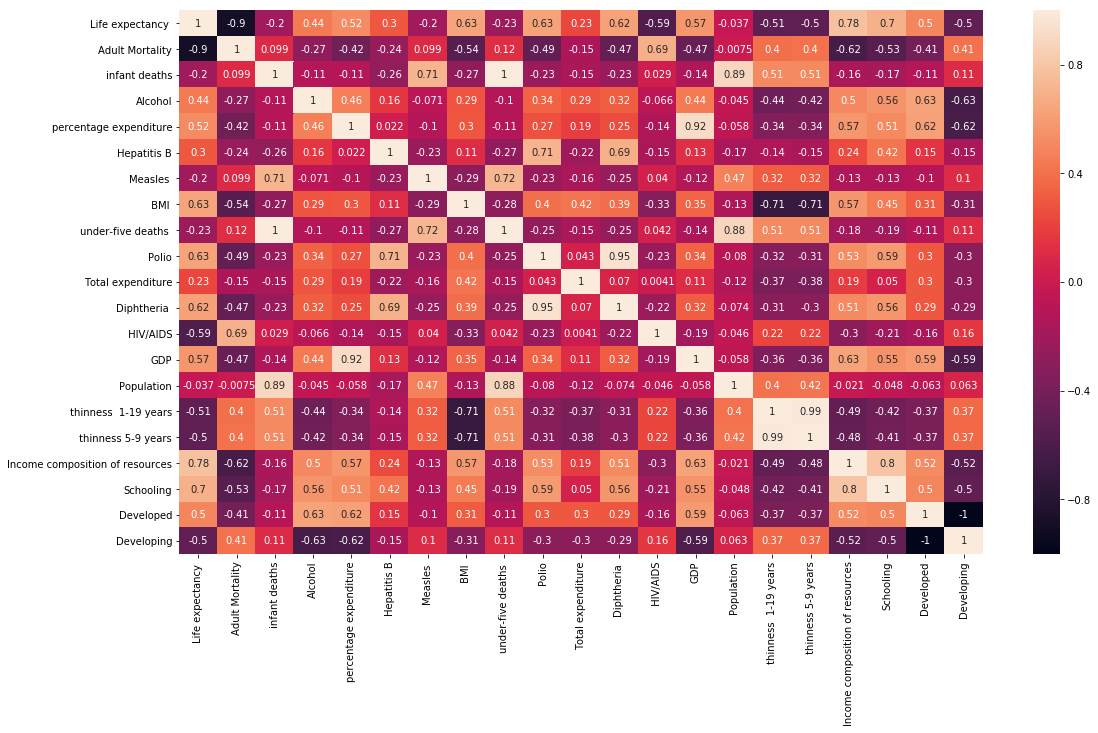

In [106]:
plt.figure(figsize = (18, 10))
sns.heatmap(LEdata2.corr(),annot=True)

In [107]:
print("The dataset contains columns of the following data types : \n" +str(LEdata2.dtypes))
print("The dataset contains following number of records for each of the columns : \n" +str(LEdata2.count()))

The dataset contains columns of the following data types : 
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                      float64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                            float64
 BMI                               float64
under-five deaths                  float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Developed                            uint8
Developing                           uint8
dtype: object
The dataset contains fo

In [226]:
label=LEdata2["Life expectancy "]
features=LEdata2.drop(["Life expectancy "],axis=1)
features


,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,269.062500,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.375000,8.252500,52.31250,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.212500,0,1
Albania,45.062500,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.125000,5.945625,98.06250,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.137500,0,1
Algeria,108.187500,20.3125,0.668929,236.185241,78.735115,1943.8750,48.74375,23.5000,91.750000,4.687387,91.87500,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.712500,0,1
Angola,328.562500,83.7500,5.669554,102.100268,74.911452,3561.3125,18.01875,132.6250,46.125000,4.045512,47.68750,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.043750,0,1
Antigua and Barbuda,127.500000,0.0000,7.740179,1001.585226,97.183779,0.0000,38.42500,0.0000,96.937500,4.863012,98.31250,0.12500,9759.305728,1.275338e+07,3.42500,3.37500,0.488625,8.843750,0,1
Argentina,106.000000,10.1250,7.756429,773.038981,81.242558,2.0000,54.98125,11.3750,93.375000,6.851762,92.37500,0.10000,6998.575103,2.012120e+07,1.07500,0.95000,0.794125,16.506250,0,1
Armenia,117.375000,1.0000,3.758929,131.007419,87.562500,274.2500,44.70625,1.0000,89.125000,4.928637,87.37500,0.10000,1999.986318,1.015165e+06,2.03750,2.11250,0.698375,11.787500,0,1
Australia,63.187500,1.0000,9.808304,5332.226473,92.621279,103.9375,55.86250,1.3750,86.750000,8.655512,86.87500,0.10000,34637.565047,4.587010e+06,0.66875,0.62500,0.918125,20.037500,1,0
Austria,65.750000,0.0000,11.758929,4928.439188,81.062500,77.2500,48.28750,0.0000,86.000000,4.791762,86.75000,0.10000,33827.476309,6.474880e+06,1.73125,1.93750,0.862375,15.387500,1,0


In [109]:
scaler1=StandardScaler()
scaler2=MinMaxScaler()
featuresSt=scaler1.fit_transform(features)
featuresMM=scaler2.fit_transform(features)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [110]:
featuresMM

array([[4.71121045e-01, 5.72552248e-02, 3.38323017e-04, ...,
        4.09856519e-01, 0.00000000e+00, 1.00000000e+00],
       [4.95235855e-02, 5.03041112e-04, 3.74185256e-01, ...,
        6.05739239e-01, 0.00000000e+00, 1.00000000e+00],
       [1.68333137e-01, 1.48625783e-02, 5.09556066e-02, ...,
        6.34435434e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.63369015e-01, 2.88105364e-02, 2.49047344e-02, ...,
        4.24516532e-01, 0.00000000e+00, 1.00000000e+00],
       [6.31572756e-01, 2.44660905e-02, 1.83819888e-01, ...,
        5.59575795e-01, 0.00000000e+00, 1.00000000e+00],
       [8.34960593e-01, 1.94356793e-02, 3.46408264e-01, ...,
        4.90330630e-01, 0.00000000e+00, 1.00000000e+00]])

In [111]:
featuresSt

array([[ 1.11629203,  0.4379361 , -1.21934134, ..., -1.14787738,
        -0.44582257,  0.44582257],
       [-1.28189424, -0.24941205,  0.11156368, ...,  0.07368425,
        -0.44582257,  0.44582257],
       [-0.60606608, -0.07549801, -1.03914247, ...,  0.25263914,
        -0.44582257,  0.44582257],
       ...,
       [ 0.50336272,  0.09343123, -1.13188426, ..., -1.05645477,
        -0.44582257,  0.44582257],
       [ 2.02899461,  0.04081392, -0.56614209, ..., -0.2141997 ,
        -0.44582257,  0.44582257],
       [ 3.18593213, -0.02011138,  0.01267685, ..., -0.64602563,
        -0.44582257,  0.44582257]])

In [112]:
#Using standard scaling 
features_train,features_test, label_train, label_test = train_test_split(featuresSt, label, train_size = 0.75, test_size = 0.25)

In [151]:
#MULTIPLE
#LINEAR
#REGRESSION
mlrmodel={'name':"",'mae':0.0,'mse':0.0,'r2':0.0}
mlrmodel['name'] = 'Multiple Linear Regression'
mlRegressor = LinearRegression()
mlRegressor.fit(features_train, label_train)
#LEdata2.isna()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [152]:
print("R square score is \t",mlRegressor.score(features_train,label_train))

print("Coefficients\t",mlRegressor.coef_)
print("Intercepts\t",mlRegressor.intercept_)

R square score is 	 0.9412829200438855
Coefficients	 [-5.32156507  9.66805298  0.82826078  0.58261837 -0.66515559 -0.38776232
  0.79616034 -9.57856909  0.47938343  0.30523155  0.98243736 -0.12480208
 -0.21055979  0.41341468 -0.28729217  0.57032719  1.0595809   0.89277472
 -0.05376685  0.05376685]
Intercepts	 69.155154433958


In [153]:
linearPred=mlRegressor.predict(features_test)
mlrmodel['mse']=mean_squared_error(label_test,linearPred)
mlrmodel['mae']=mean_absolute_error(label_test,linearPred)
mlrmodel['r2']=r2_score(label_test,linearPred)
print("Mean squared error=",mlrmodel['mse'])
print("Mean absolute error=",mlrmodel['mae'])
print("R squared score=",mlrmodel['r2'])

Mean squared error= 10.806413419098664
Mean absolute error= 2.461920368091182
R squared score= 0.8333427399117875


In [116]:
#with multilinear regression we are getting a mean absolute error of 2.0 and r squared score of 0.88 

#POLYNOMIAL
#LINEAR
#REGRESSION

plrmodel={'name':"",'mae':0.0,'mse':0.0,'r2':0.0}
plrmodel['name'] = 'Polynomial Linear Regression'

poly_features= PolynomialFeatures(degree=3)
plRegressor = LinearRegression()

polytrain=poly_features.fit_transform(features_train)
polytest=poly_features.fit_transform(features_test)
plRegressor.fit(polytrain, label_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
print("accuracy score is \t",plRegressor.score(polytrain,label_train))

print("Coefficients\t",plRegressor.coef_)
print("Intercepts\t",plRegressor.intercept_)

accuracy score is 	 1.0
Coefficients	 [ 0.00212655 -1.42884297 -0.28347308 ... -0.02372195  0.02372195
 -0.02368306]
Intercepts	 68.37437385379627


In [118]:
#polynomial regression training score is 1.0 which means exact mapping , therefore we already know this is not viable, we will still test it out.
polyPredict=plRegressor.predict(polytest)
plrmodel['mae']=mean_absolute_error(label_test,polyPredict)
plrmodel['mse']=mean_squared_error(label_test,polyPredict)
plrmodel['r2']=r2_score(label_test,polyPredict)
print("mean absolute error is =",plrmodel['mae'])
print("mean squared error is=",plrmodel['mse'])
print("r2 score is=",plrmodel['r2'])


mean absolute error is = 45.74567062906336
mean squared error is= 79669.27026902481
r2 score is= -1227.6650326367396


In [119]:
#As we can see this algorithm fails 
#DECISION
#TREE
#REGRESSION

dtmodel={'name':"",'mae':0.0,'mse':0.0,'r2':0.0}
dtmodel['name'] = "Decision Tree Regressor"
dtRegressor=DecisionTreeRegressor()

dtfit=dtRegressor.fit(features_train,label_train)
dtscore=np.mean(cross_val_score(dtRegressor,features_train,label_train,cv=5))
print("mean cross validation score=",dtscore)




mean cross validation score= 0.70333782625542


In [131]:
grid_cv = GridSearchCV(DecisionTreeRegressor(),
              param_grid={'min_samples_split': range(2, 20)},
              scoring=make_scorer(r2_score), cv=5, refit=True)

grid_cv.fit(features_train, label_train)

print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_

print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(features_train, label_train))
dtmodel['r2']=r2_score(label_test, grid_cv.best_estimator_.predict(features_test))
dtmodel['mse']= mean_squared_error(label_test, grid_cv.best_estimator_.predict(features_test))
dtmodel['mae']=mean_absolute_error(label_test, grid_cv.best_estimator_.predict(features_test))
print("R^2 score: %.2f"
      % dtmodel['r2'])

print("Mean squared error: %.2f"
      %dtmodel['mse'])
print("Mean absolute error: %.2f"
      % dtmodel['mae'])


Best Parameters: {'min_samples_split': 4}
R^2 score on training data: 1.00
R^2 score: 0.88
Mean squared error: 7.60
Mean absolute error: 2.10


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
#Random 
#Forest 
#Regression

rfmodel={'name':"",'mae':0.0,'mse':0.0,'r2':0.0}
rfmodel['name']="Random Forest Regression"
rfregressor= RandomForestRegressor()
random_forest_fit = rfregressor.fit(features_train, label_train)

random_forest_score = cross_val_score(random_forest_fit, features_train, label_train, cv = 5)
print("mean cross validation score: %.2f"
       % np.mean(random_forest_score))
rfpredict = rfregressor.predict(features_test)
print("R^2 score on the test data %.2f"%r2_score(label_test, rfpredict))




In [157]:

scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(RandomForestRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(features_train, label_train)
grid_cv.best_params_

print("Best Parameters: " + str(grid_cv.best_params_))
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(features_train, label_train))
rfmodel['r2']=r2_score(label_test, grid_cv.best_estimator_.predict(features_test))
print("R^2 score: %.2f"
      % rfmodel['r2'])
rfmodel['mse']=mean_squared_error(label_test,grid_cv.best_estimator_.predict(features_test) )
print("Mean squared error: %.2f"
      %rfmodel['mse'] )
rfmodel['mae']=mean_absolute_error(label_test, grid_cv.best_estimator_.predict(features_test))
print("Mean absolute error: %.2f"
      % rfmodel['mae'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3

Best Parameters: {'min_samples_split': 5}
R^2 score on training data: 0.98
R^2 score: 0.88
Mean squared error: 7.66
Mean absolute error: 2.09


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes 

Text(0.5, 1.0, 'R squared score on test data')

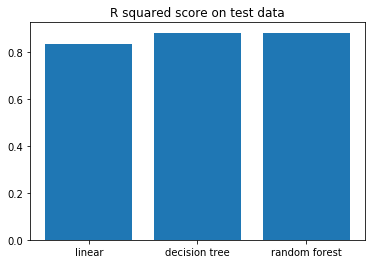

In [158]:
#graphing the results

plt.bar(['linear','decision tree','random forest'],[mlrmodel['r2'],dtmodel['r2'],rfmodel['r2']])
plt.title("R squared score on test data")

Text(0.5, 1.0, 'Mean Squared Error')

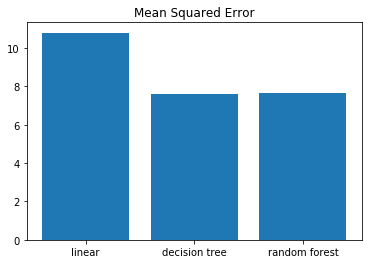

In [159]:
plt.bar(['linear','decision tree','random forest'],[mlrmodel['mse'],dtmodel['mse'],rfmodel['mse']])
plt.title("Mean Squared Error")

Text(0.5, 1.0, 'Mean Absolute Error')

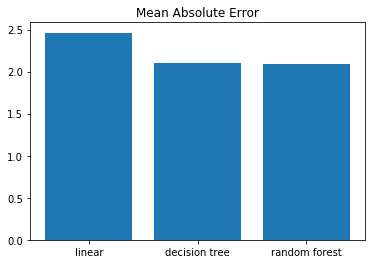

In [160]:
plt.bar(['linear','decision tree','random forest'],[mlrmodel['mae'],dtmodel['mae'],rfmodel['mae']])
plt.title("Mean Absolute Error")

In [161]:
#Random forest regression and decision tree regression both yield very similar results 
#We use random forest algorithm because it has a lesser mean absolute error

In [222]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
import pickle

wml_credentials={
  "apikey": "NaxR63AlXCWgmhe4NO49ln8peBQ9aRuuycnZLNN95gLd",
  "iam_apikey_description": "Auto-generated for key 82b30c7e-bd46-4cff-bc43-41510dd8581d",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/41cf0a318a9b4d0f8b77477965f31b95::serviceid:ServiceId-daf85e05-7ad3-4b14-858a-5fce517d02b4",
  "instance_id": "b332c7af-bd47-4661-8838-416b19638f69",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}
client = WatsonMachineLearningAPIClient(wml_credentials)
print(client.version)
#pickle.dump(rfregressor,open('rf.pkl','wb'))
#client.repository.delete('7590e1f5-4600-4a57-9ef5-5fbceff21006')

#client.deployments.delete('19769ddd-b6b3-4e4f-b6c3-d31e8d5bc8ca')
client.repository.list_models()
client.deployments.list()



1.0.376
----  ----  -------  ---------
GUID  NAME  CREATED  FRAMEWORK
----  ----  -------  ---------
----  ----  ----  -----  -------  ---------  -------------
GUID  NAME  TYPE  STATE  CREATED  FRAMEWORK  ARTIFACT TYPE
----  ----  ----  -----  -------  ---------  -------------


In [223]:
meta_props={client.repository.ModelMetaNames.NAME: "Model to estimate life cycle expectancy"}
published_model = client.repository.store_model(model=grid_cv, meta_props={client.repository.ModelMetaNames.NAME: "Model to estimate life cycle expectancy"})

client.repository.list_models()

# get UID of our just stored model
model_uid = client.repository.get_model_uid(published_model)
print("Model id: {}".format(model_uid))

------------------------------------  ---------------------------------------  ------------------------  -----------------
GUID                                  NAME                                     CREATED                   FRAMEWORK
e43450e8-61fe-4eb7-a0e4-3e3b358bc8b5  Model to estimate life cycle expectancy  2020-05-29T22:39:18.320Z  scikit-learn-0.20
------------------------------------  ---------------------------------------  ------------------------  -----------------
Model id: e43450e8-61fe-4eb7-a0e4-3e3b358bc8b5


In [224]:
# create deployment
created_deployment = client.deployments.create(model_uid, name="Life Expectancy Model")


client.deployments.list()

# get UID of our new deployment
deployment_uid = client.deployments.get_uid(created_deployment)
print("Deployment id: {}".format(deployment_uid))
print(created_deployment)



#######################################################################################

Synchronous deployment creation for uid: 'e43450e8-61fe-4eb7-a0e4-3e3b358bc8b5' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='e14f5488-a900-45fa-b03a-3750739be5d9'
------------------------------------------------------------------------------------------------


------------------------------------  ---------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                   TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
e14f5488-a900-45fa-b03a-3750739be5d9  Life Expectancy Model  online  DEPLOY_SUCCESS  2020-05-29T22:39:31.366Z  scikit-l

In [225]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
print(scoring_endpoint)

https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/b332c7af-bd47-4661-8838-416b19638f69/deployments/e14f5488-a900-45fa-b03a-3750739be5d9/online
